In [2]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender = pd.read_csv('gender_submission.csv')

In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [7]:
test.insert(1,'Survived',gender['Survived'])

In [8]:
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
test = test.drop(columns=['Name','Ticket','Cabin'])
train = train.drop(columns=['Name','Ticket','Cabin'])

In [11]:
test=pd.get_dummies(test, columns=["Pclass","Embarked","Sex"])
train=pd.get_dummies(train, columns=["Pclass","Embarked","Sex"])

In [12]:
test

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,892,0,34.5,0,0,7.8292,0,0,1,0,1,0,0,1
1,893,1,47.0,1,0,7.0000,0,0,1,0,0,1,1,0
2,894,0,62.0,0,0,9.6875,0,1,0,0,1,0,0,1
3,895,0,27.0,0,0,8.6625,0,0,1,0,0,1,0,1
4,896,1,22.0,1,1,12.2875,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,NaN,0,0,8.0500,0,0,1,0,0,1,0,1
414,1306,1,39.0,0,0,108.9000,1,0,0,1,0,0,1,0
415,1307,0,38.5,0,0,7.2500,0,0,1,0,0,1,0,1
416,1308,0,NaN,0,0,8.0500,0,0,1,0,0,1,0,1


In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Age            177
SibSp            0
Parch            0
Fare             0
Pclass_1         0
Pclass_2         0
Pclass_3         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Sex_female       0
Sex_male         0
dtype: int64

In [14]:
print('Percent of missing "Age" records for the train dataset is %.2f%%' %((train['Age'].isnull().sum()/train.shape[0])*100))
print('Percent of missing "Age" records for the test dataset is %.2f%%' %((test['Age'].isnull().sum()/test.shape[0])*100))

Percent of missing "Age" records for the train dataset is 19.87%
Percent of missing "Age" records for the test dataset is 20.57%


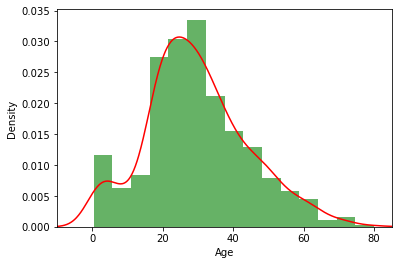

In [15]:
ax = train["Age"].hist(bins=15, density=True, stacked=True, color='green', alpha=0.6)
train["Age"].plot(kind='density', color='red')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [16]:
# mean age
print('The mean of "Age" for train data is %.2f' %(train["Age"].mean(skipna=True)))
# median age
print('The median of "Age" for train data is %.2f' %(train["Age"].median(skipna=True)))

The mean of "Age" for train data is 29.70
The median of "Age" for train data is 28.00


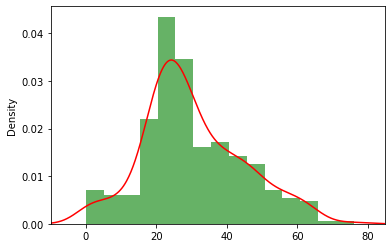

In [17]:
bx = test["Age"].hist(bins=15, density=True, stacked=True, color='green', alpha=0.6)
test["Age"].plot(kind='density', color='red')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [18]:
# mean age
print('The mean of "Age" for test data is %.2f' %(test["Age"].mean(skipna=True)))
# median age
print('The median of "Age" for test data is %.2f' %(test["Age"].median(skipna=True)))

The mean of "Age" for test data is 30.27
The median of "Age" for test data is 27.00


In [19]:
train = train.copy()
train["Age"].fillna(train["Age"].median(skipna=True), inplace=True)
test = test.copy()
test["Age"].fillna(test["Age"].median(skipna=True), inplace=True)

In [20]:
train.isnull().sum()
test.isnull().sum()



PassengerId    0
Survived       0
Age            0
SibSp          0
Parch          0
Fare           1
Pclass_1       0
Pclass_2       0
Pclass_3       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Sex_female     0
Sex_male       0
dtype: int64

In [21]:
print('Percent of missing "Fare" records for the train data is %.2f%%' %((train['Fare'].isnull().sum()/train.shape[0])*100))
print('Percent of missing "Fare" records for the test data is %.2f%%' %((test['Fare'].isnull().sum()/test.shape[0])*100))

Percent of missing "Fare" records for the train data is 0.00%
Percent of missing "Fare" records for the test data is 0.24%


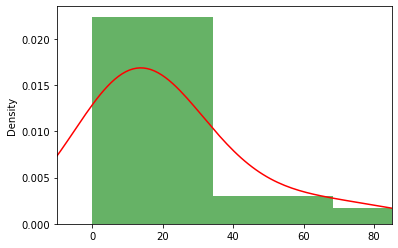

In [22]:
cx = test["Fare"].hist(bins=15, density=True, stacked=True, color='green', alpha=0.6)
test["Fare"].plot(kind='density', color='red')
bx.set(xlabel='Fare')
plt.xlim(-10,85)
plt.show()

In [23]:
# mean fare
print('The mean of "Fare" for the test data is %.2f' %(test["Fare"].mean(skipna=True)))
# median fare
print('The median of "Fare" for the test data is %.2f' %(test["Fare"].median(skipna=True)))

The mean of "Fare" for the test data is 35.63
The median of "Fare" for the test data is 14.45


In [24]:
test["Fare"].fillna(test["Fare"].median(skipna=True), inplace=True)

In [25]:
test.isnull().sum()

PassengerId    0
Survived       0
Age            0
SibSp          0
Parch          0
Fare           0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Sex_female     0
Sex_male       0
dtype: int64

In [26]:
## splitting
X_train = train.drop('Survived',axis=1)
y_train = train['Survived']

X_test = test.drop('Survived', axis=1)
y_test = test['Survived']


In [27]:
## train the LOGISTIC REGRESSION
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

c:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
## make the prediction
pred_LR = model_LR.predict(X_test) 
pd.DataFrame({'Actual': y_test, 'Prediction': pred_LR})

,Actual,Prediction
0,0,0
1,1,0
2,0,0
3,0,0
4,1,1
...,...,...
413,0,0
414,1,1
415,0,0
416,0,0


In [29]:
## evaluate the model accuracy
accuracy_LR =accuracy_score(y_test, pred_LR)
## confusion metrics
conf_mat = confusion_matrix(y_test, pred_LR)
print(accuracy_LR)
print(conf_mat)

0.9521531100478469
[[253  13]
 [  7 145]]


In [30]:
## MAE mean ABS error
## MSE square error (average of the square of differences, lower-better)
## RMSE
## R2 (measure of variations/changes of the target value, 0 o 1, higher is better)

print('MAE:', metrics.mean_absolute_error(y_test, pred_LR))
print('MSE:', metrics.mean_squared_error(y_test, pred_LR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_LR)))
print('R2:', metrics.r2_score(y_test, pred_LR))

MAE: 0.04784688995215311
MSE: 0.04784688995215311
RMSE: 0.21873931962990356
R2: 0.793233082706767


In [31]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [32]:
#predit the test set
y_pred_NB = model_NB.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Prediction': y_pred_NB})

,Actual,Prediction
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
413,0,0
414,1,1
415,0,0
416,0,0


In [33]:
accuracy_NB = accuracy_score(y_test,y_pred_NB)
conf_mat_NB = confusion_matrix(y_test,y_pred_NB)
print(accuracy_NB)
print(conf_mat_NB)

0.9090909090909091
[[233  33]
 [  5 147]]


In [34]:
## MAE mean ABS error
## MSE square error (average of the square of differences, lower-better)
## RMSE
## R2 (measure of variations/changes of the target value, 0 o 1, higher is better)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_NB))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_NB))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_NB)))
print('R2:', metrics.r2_score(y_test, y_pred_NB))

MAE: 0.09090909090909091
MSE: 0.09090909090909091
RMSE: 0.30151134457776363
R2: 0.6071428571428572
